## Data Analysis Project - Abalone Age Prediction

Welcome to my data analysis project! In this project, we will explore the fascinating world of abalones, a type of marine mollusk, as we investigate how their physical characteristics can help us predict their age.

The dataset used in this project is known as the "Abalone Dataset." It was originally derived from observations of abalones, a type of marine mollusk, conducted by marine biologists. These biologists collected data on abalones over time as part of their research studies. It contains detailed information about abalones, including physical measurements such as length, diameter, height, and weight. The target variable for this study is the age of abalones, which is traditionally estimated by counting the rings on their shells, but we will explore ways to predict age from physical characteristics.

The original dataset can be found on the [UCI Machine Learning Repository page](https://archive.ics.uci.edu/dataset/1/abalone), which is a renowned source of datasets for machine learning research. It is publicly available for use in data analysis and machine learning projects.

This dataset presents an exciting opportunity to explore the physical characteristics of abalones and build models that can predict their age based on these features. Feel free to explore, learn, and, of course, contribute your insights throughout this project. Let's dive into the world of abalones!

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import custom_functions as hm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [93]:
column_names = ["Sex", "Length", "Diameter", "Height", "WholeWeight", "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"]
abalone = pd.read_csv("abalone.csv", names=column_names, header=0)
abalone

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Initial data exploration

In this section, we conduct an initial exploratory data analysis (EDA) of our Abalone dataset. EDA is the crucial first step in understanding the dataset, its characteristics, and potential insights.

#### Basic information

In [94]:
print("Dataset Shape:", abalone.shape)

print("\nColumn Data Types")
print(abalone.dtypes)

Dataset Shape: (4177, 9)

Column Data Types
Sex               object
Length           float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
Rings              int64
dtype: object


#### Dataset first glance

In [95]:
abalone.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Summary statistics

In [96]:
abalone.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Missing data

In [97]:
missing_data = abalone.isnull().sum()
missing_data

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

#### Unique values

In [98]:
print("Column | Unique Values Count\n")

for column in abalone.columns:
    unique_values_total = abalone[column].nunique()
    print(f"{column} | {unique_values_total}")

Column | Unique Values Count

Sex | 3
Length | 134
Diameter | 111
Height | 51
WholeWeight | 2429
ShuckedWeight | 1515
VisceraWeight | 880
ShellWeight | 926
Rings | 28


In [99]:
abalone['Sex'].replace({'M': 'Male', 'F': 'Female', 'I': 'Infant'}, inplace=True)
sex_counts = abalone['Sex'].value_counts()

print("Distribution of 'Sex' Column\n")
print(sex_counts)

Distribution of 'Sex' Column

Male      1528
Infant    1342
Female    1307
Name: Sex, dtype: int64


#### Correlation heatmap

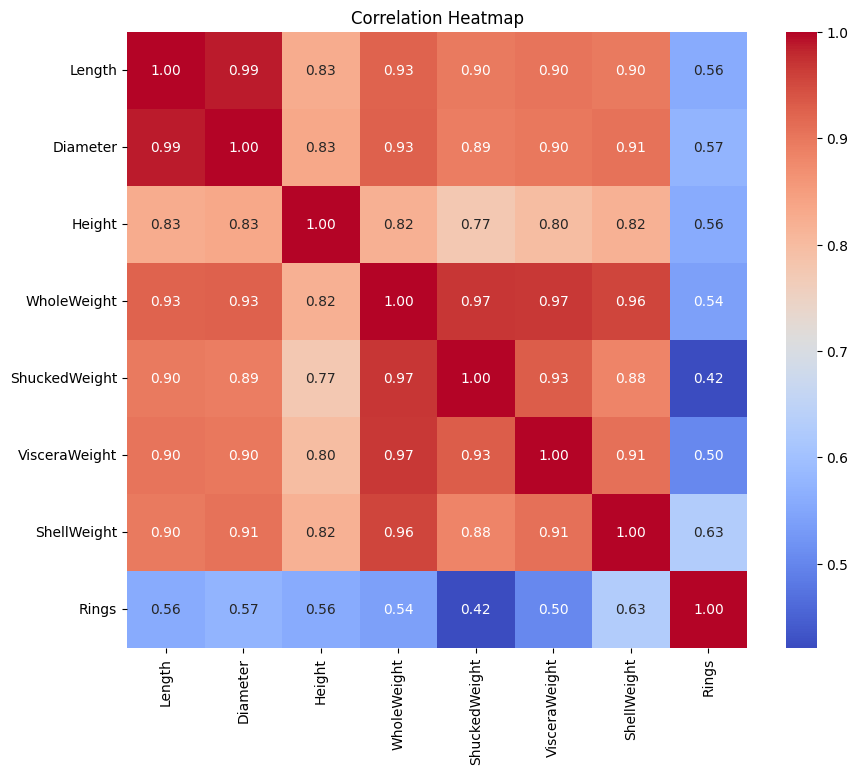

In [100]:
plt.figure(figsize=(10, 8))
correlation_matrix = abalone.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### Pairwise scatterplot

c:\Users\Mantovani\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


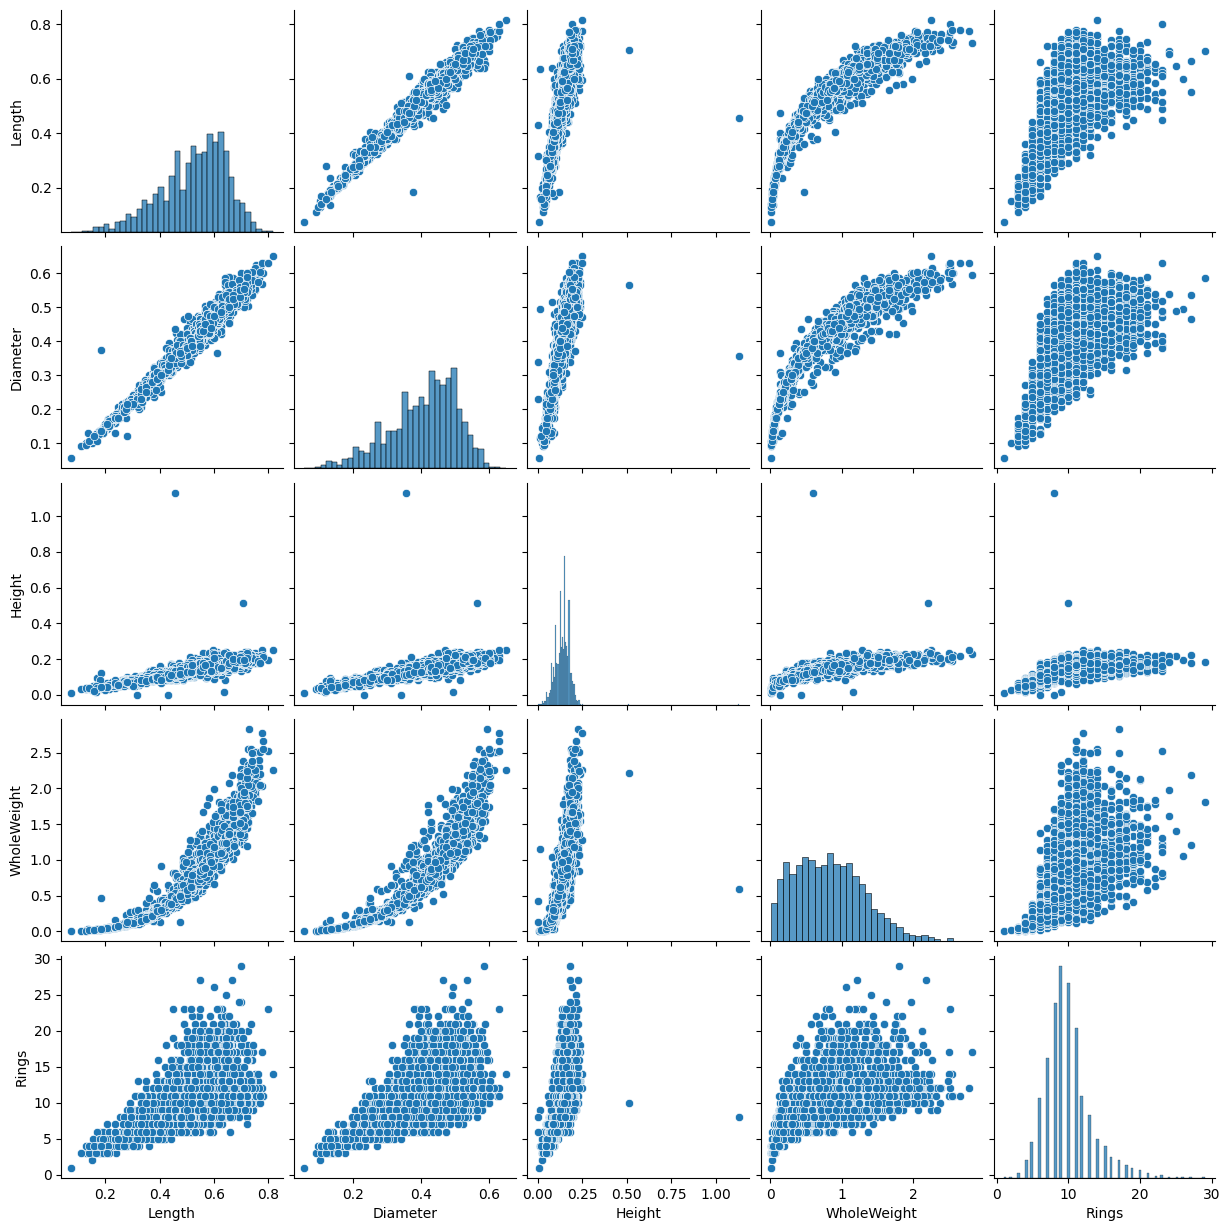

In [101]:
sns.pairplot(abalone[['Length', 'Diameter', 'Height', 'WholeWeight', 'Rings']])
plt.show()

### Data distribution

#### Sex

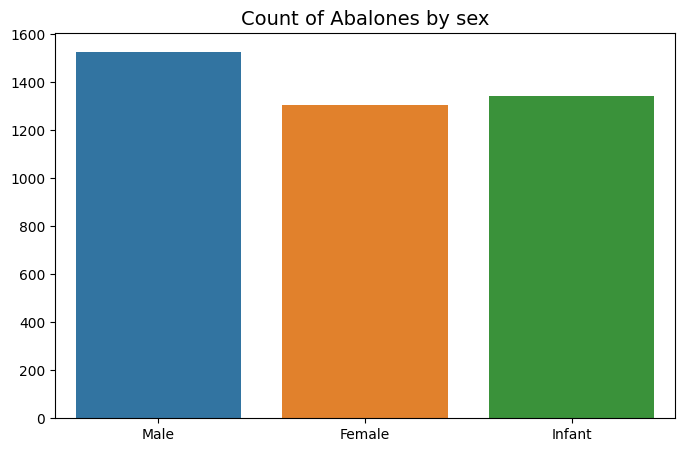

In [102]:
# Create a count plot for the distribution of "Sex"
plt.figure(figsize=(8, 5))
sns.countplot(data=abalone, x='Sex')
plt.title('Count of Abalones by sex', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Rings

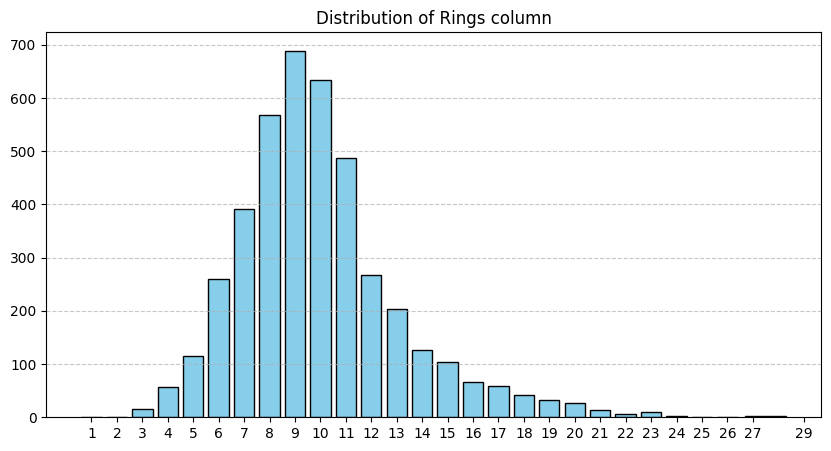

In [103]:
unique_values = np.unique(abalone['Rings'])

plt.figure(figsize=(10, 5))
plt.hist(abalone['Rings'], bins=unique_values - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Rings column')
plt.xlabel('')
plt.ylabel('')
plt.xticks(unique_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Diameter

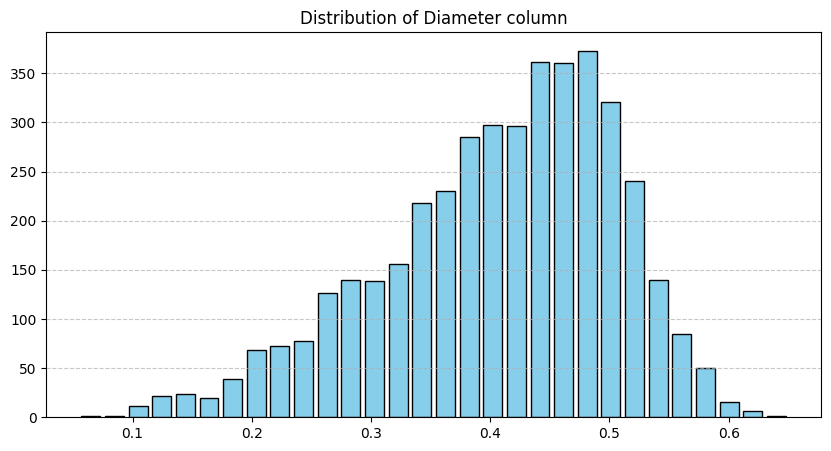

In [104]:
unique_values = np.unique(abalone['Diameter'])

plt.figure(figsize=(10, 5))
plt.hist(abalone['Diameter'], bins=30, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Diameter column')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Length

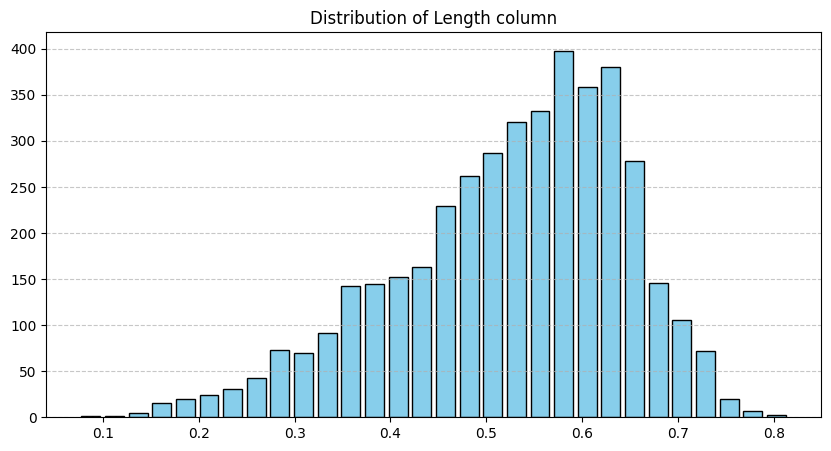

In [105]:
unique_values = np.unique(abalone['Length'])

plt.figure(figsize=(10, 5))
plt.hist(abalone['Length'], bins=30, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Length column')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Height

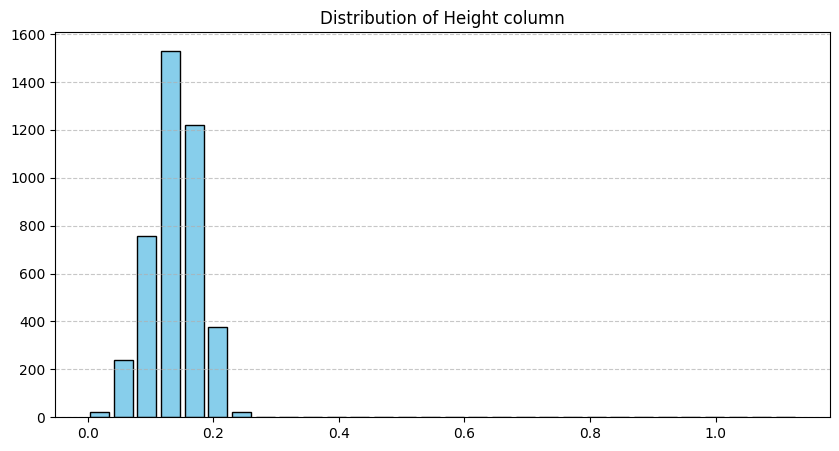

In [106]:
unique_values = np.unique(abalone['Height'])

plt.figure(figsize=(10, 5))
plt.hist(abalone['Height'], bins=30, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Height column')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

There seems to be some clear outliers here, with at least 1 abalone surpassing the 1.0 mark. Let's use some quick math to check for outliers **above** the upper bound.

In [107]:
adults = abalone[(abalone['Sex'] != 'Infant')]

Q1 = adults['Height'].quantile(0.25)
Q3 = adults['Height'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = adults[(adults['Height'] > upper_bound)].sort_values(by='Height', ascending=False)
outliers = hm.highlight_columns(outliers, columns_to_color=['Height'])
outliers

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
2051,Female,0.455000,0.355000,1.130000,0.594000,0.332000,0.116000,0.133500,8
1417,Male,0.705000,0.565000,0.515000,2.210000,1.107500,0.486500,0.512000,10
1428,Female,0.815000,0.650000,0.250000,2.255000,0.890500,0.420000,0.797500,14
1763,Male,0.775000,0.630000,0.250000,2.779500,1.348500,0.760000,0.578000,12
2179,Female,0.595000,0.470000,0.250000,1.283000,0.462000,0.247500,0.445000,14
277,Male,0.610000,0.500000,0.240000,1.642000,0.532000,0.334500,0.690000,18
307,Male,0.645000,0.515000,0.240000,1.541500,0.471000,0.369000,0.535000,13
1528,Male,0.725000,0.575000,0.240000,2.210000,1.351000,0.413000,0.501500,13
2161,Female,0.715000,0.565000,0.240000,2.199500,0.724500,0.465000,0.885000,17
506,Male,0.560000,0.460000,0.235000,0.839500,0.332500,0.157000,0.305000,12


There are indeed two clear outliers, with the biggest Abalone having its Height set as 1.13! Let's focus on the two tallest Abalones. The bigger one is a female Abalone. Even though its Height is more than twice the second highest value, its Weight doesn't follow the logic. This seems to be a measurement error. The Male one may also be an error because it's twice as big as the third highest measurement, but weighs less than 2 smaller Abalones. We'll definitely review this later when we check for outliers to remove before training a model.

### Data visualization

#### Violin Plot of Rings vs. Sex

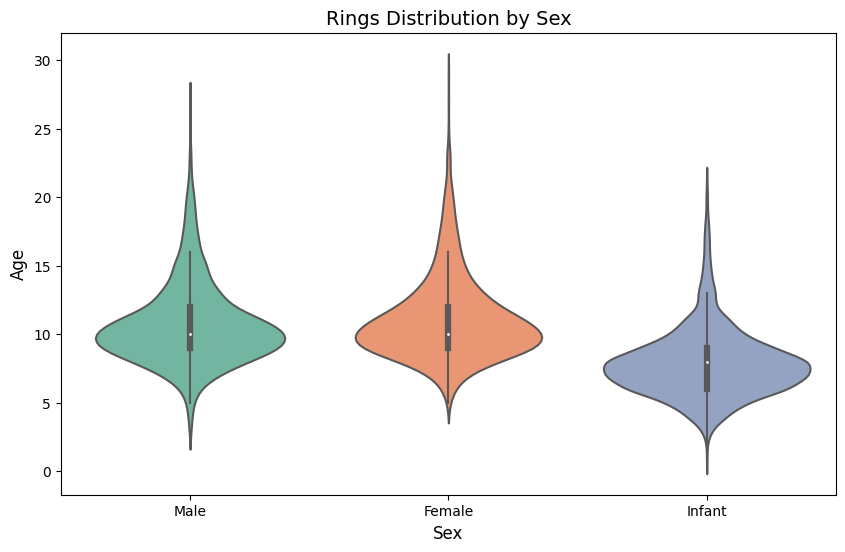

In [108]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=abalone, x='Sex', y='Rings', palette='Set2')
plt.title('Rings Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

#### Violin Plot of Length vs. Sex

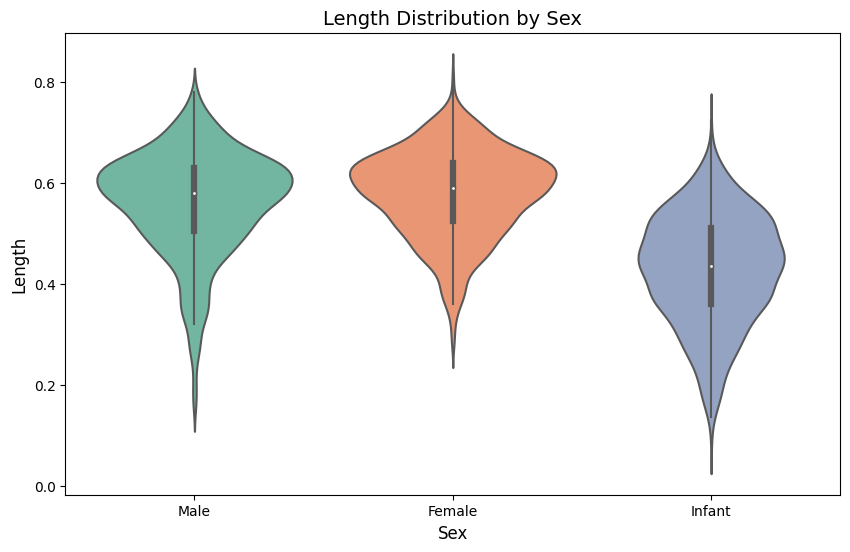

In [109]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=abalone, x='Sex', y='Length', palette='Set2')
plt.title('Length Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Length', fontsize=12)
plt.show()

#### Violin Plot of Diameter vs. Sex

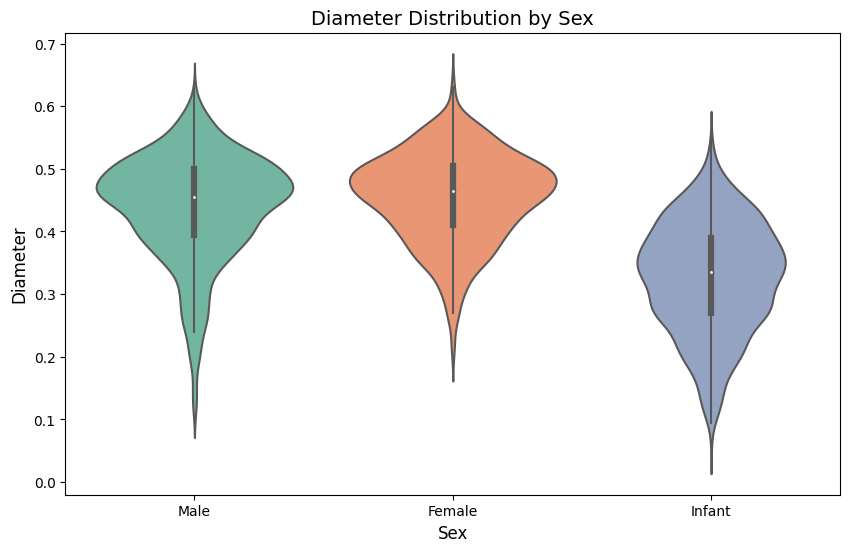

In [110]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=abalone, x='Sex', y='Diameter', palette='Set2')
plt.title('Diameter Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Diameter', fontsize=12)
plt.show()

#### Violin Plot of Weight vs. Sex

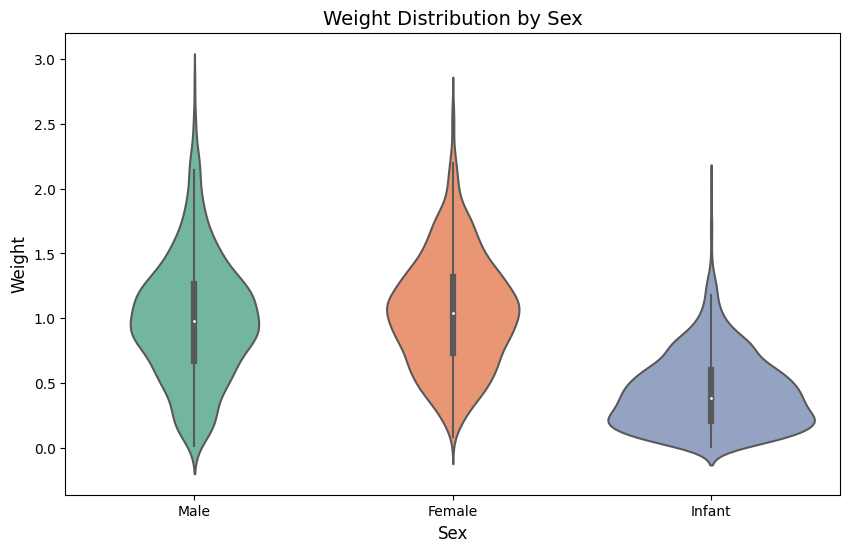

In [111]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=abalone, x='Sex', y='WholeWeight', palette='Set2')
plt.title('Weight Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.show()

## Outlier checking

### Box plot of each column

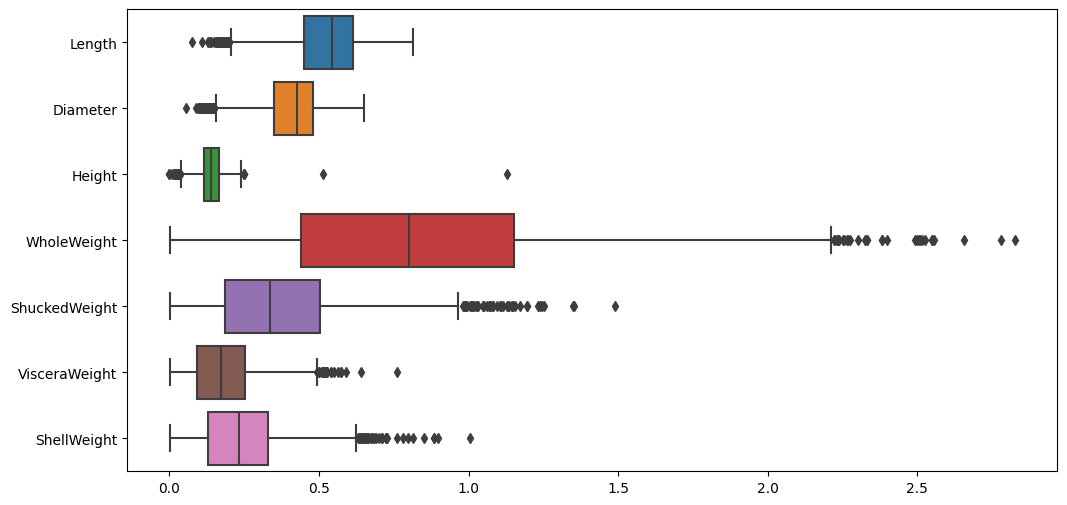

In [112]:
outlier_check = abalone.drop(["Rings", "Sex"], axis=1)

plt.figure(figsize=(12, 6))
sns.boxplot(data=outlier_check, orient='h')
plt.show()

### Z-stats

By using Z-stats, we can check for outliers in each column. We used a threshold of 3 and we found almost 100 outliers in the dataset. We have removed them from the dataset but there are still more than 4000 rows left so there shouldn't be a problem when we begin the modeling process.

In [113]:
z_scores = stats.zscore(outlier_check)
outliers_z = (z_scores > 3) | (z_scores < -3)
outliers_z = outliers_z.any(axis=1)
abalone_clean = abalone[~outliers_z]
abalone_clean

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,Male,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,Male,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,Female,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,Male,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,Female,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,Male,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,Male,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,Female,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Predicting the Abalones age

### Splitting into features and target

In [114]:
x = abalone_clean.drop(['Rings', 'Sex'], axis=1)
y = abalone_clean['Rings']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

### Training the models

In [115]:
models = []
model_names = []
mae_values = []
mse_values = []
rmse_values = []
r2_values = []

# Decision Trees
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
models.append(("Decision Tree", dt_model))

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
models.append(("Random Forest", rf_model))

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train, y_train)
models.append(("Gradient Boosting", gb_model))

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(x_train, y_train)
models.append(("XGBoost", xgb_model))

# Support Vector Machines
svm_model = SVR()
svm_model.fit(x_train, y_train)
models.append(("Support Vector Machines", svm_model))

### Evaluating the models

Model: Decision Tree
Mean Absolute Error: 2.0318237454100365
Mean Squared Error: 8.670746634026928
Root Mean Squared Error: 2.9446131552424553
R-squared: 0.1270430135422611


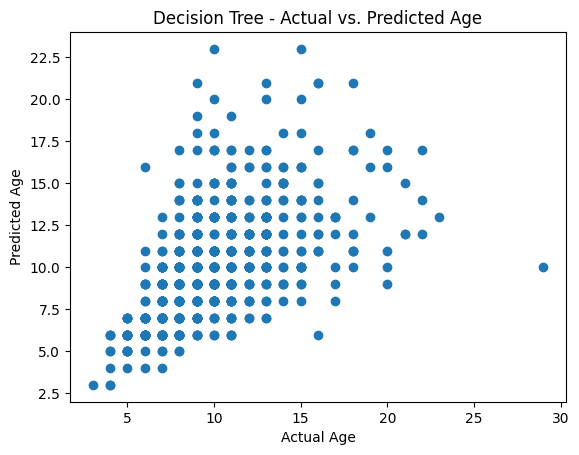

Model: Random Forest
Mean Absolute Error: 1.5511627906976746
Mean Squared Error: 4.883573317013464
Root Mean Squared Error: 2.209880837740683
R-squared: 0.5083296022933637


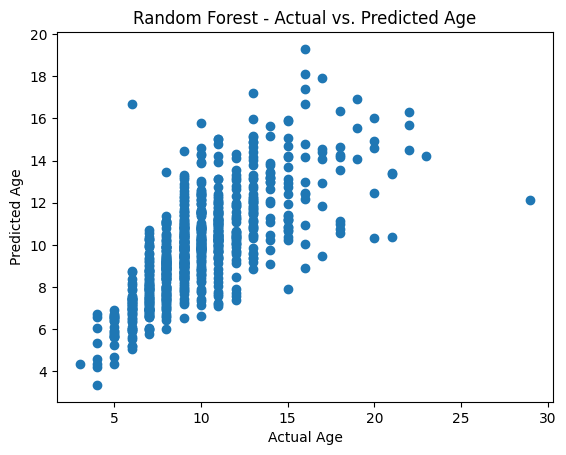

Model: Gradient Boosting
Mean Absolute Error: 1.5724490067372572
Mean Squared Error: 5.030637665274144
Root Mean Squared Error: 2.2429083051418184
R-squared: 0.4935233975117357


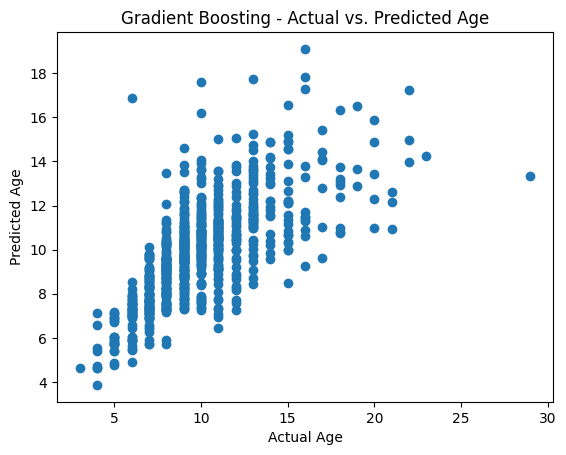

Model: XGBoost
Mean Absolute Error: 1.6292875376296305
Mean Squared Error: 5.60984753714953
Root Mean Squared Error: 2.368511671313766
R-squared: 0.4352094684327027


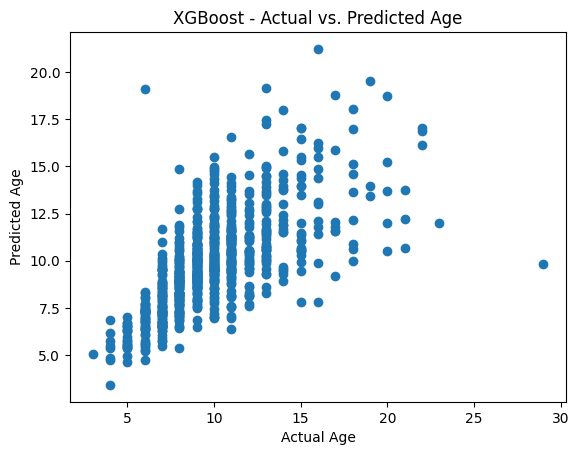

Model: Support Vector Machines
Mean Absolute Error: 1.54869984236151
Mean Squared Error: 5.174528563522033
Root Mean Squared Error: 2.2747590121861334
R-squared: 0.47903669063228005


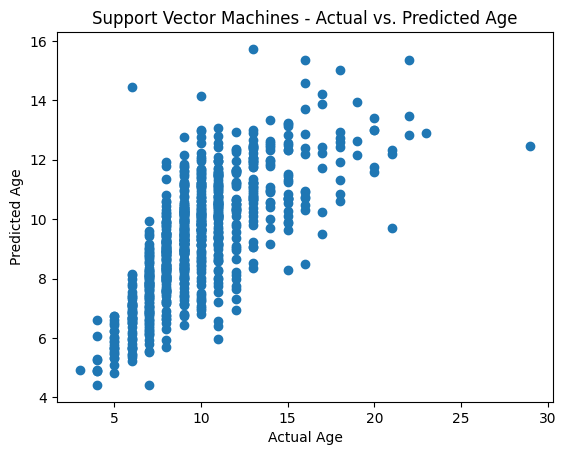

In [116]:
for model_name, model in models:
    y_pred = model.predict(x_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r2)

    # Append the metrics to the lists
    model_names.append(model_name)
    mae_values.append(mae)
    mse_values.append(mse)
    rmse_values.append(rmse)
    r2_values.append(round(r2*100, 5))

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Age")
    plt.ylabel("Predicted Age")
    plt.title(f"{model_name} - Actual vs. Predicted Age")
    plt.show()

### Model metrics summary

In [117]:
metrics_df = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'MSE': mse_values,
    'RMSE': rmse_values,
    'R2': r2_values})

metrics_df.sort_values(by='R2', ascending=False)

,Model,MAE,MSE,RMSE,R2
1,Random Forest,1.551163,4.883573,2.209881,50.83296
2,Gradient Boosting,1.572449,5.030638,2.242908,49.35234
4,Support Vector Machines,1.548700,5.174529,2.274759,47.90367
3,XGBoost,1.629288,5.609848,2.368512,43.52095
0,Decision Tree,2.031824,8.670747,2.944613,12.70430


### Modelling conclusion

- **Random Forest** demonstrated the best performance among the models, achieving the lowest MAE, MSE, and RMSE. It also exhibited the highest R-squared value, indicating a better fit to the data.

- **Gradient Boosting** closely followed Random Forest, with similar MAE, MSE, and RMSE values. It also had a competitive R-squared score, signifying a strong predictive capability.

- **Support Vector Machines** performed reasonably well, with slightly higher MAE, MSE, and RMSE values compared to the top models. However, it achieved a moderate R2 score.

- **Decision Tree** had the highest MAE, MSE, and RMSE values, suggesting the least accuracy in age prediction. Its R-squared value was also notably lower than the other models, indicating a weaker fit to the data.

### Seeing the predictions

### Cross-validation 10-fold

In [118]:
folds = 10

# Perform k-fold cross-validation for the RF model
mse_scores = cross_val_score(rf_model, x_train, y_train, cv=folds, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, x_train, y_train, cv=folds, scoring='r2')

# Calculate the mean and standard deviation of the cross-validation scores
rmse_scores = (-mse_scores) ** 0.5  # Convert back to RMSE
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()
mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

print(f"Cross-Validation RMSE (k={folds})")
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

print(f"\nCross-Validation R-squared (k={folds})")
print("Mean R-squared:", mean_r2)
print("Standard Deviation of R-squared:", std_r2)

Cross-Validation RMSE (k=10)
Mean RMSE: 2.178718375480121
Standard Deviation of RMSE: 0.11853129327509303

Cross-Validation R-squared (k=10)
Mean R-squared: 0.524342000189226
Standard Deviation of R-squared: 0.03226390399151201


## Predicting the Abalones age group

As we saw before, the models achieve a really high rate of precision when we input all possible variables about the Abalone. But in the real world, it would be way more useful if we could predict the age group. The most important result of this prediction is maintaining a sustainable harvest practice, so we need to be able to predict the age group of the Abalone right before it is harvested, which would be the most useful scenario.

In [122]:
abalone_groups = abalone_clean.copy()
abalone_groups['Group'] = pd.cut(abalone_groups['Rings'], bins=[0, 8, 13, float('inf')], labels=['Infant', 'Adult', 'Senior'], right=False)
abalone_groups['Group'].value_counts()

Adult     2600
Infant     821
Senior     663
Name: Group, dtype: int64

In [135]:
# Creating test and train data
x = abalone_groups.drop(['Group', 'Sex', 'Rings'], axis=1)
y = abalone_groups['Group']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

# Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=21)
logistic_model.fit(x_train, y_train)
logistic_predictions = logistic_model.predict(x_test)

# Random Forest Classifier model
rf_classifier_model = RandomForestClassifier(random_state=21)
rf_classifier_model.fit(x_train, y_train)
rf_classifier_predictions = rf_classifier_model.predict(x_test)

# SVM Classifier model
svm_classifier_model = SVC(random_state=21)
svm_classifier_model.fit(x_train, y_train)
svm_classifier_predictions = svm_classifier_model.predict(x_test)

# Accuracy scores
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
rf_classifier_accuracy = accuracy_score(y_test, rf_classifier_predictions)
svm_classifier_accuracy = accuracy_score(y_test, svm_classifier_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Random Forest Classifier Accuracy:", rf_classifier_accuracy)
print("SVM Classifier Accuracy:", svm_classifier_accuracy)

# Confusion matrices
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)
rf_classifier_confusion_matrix = confusion_matrix(y_test, rf_classifier_predictions)
svm_classifier_confusion_matrix = confusion_matrix(y_test, svm_classifier_predictions)

print("\nLogistic Regression Confusion Matrix\n", logistic_confusion_matrix)
print("\nRandom Forest Classifier Confusion Matrix\n", rf_classifier_confusion_matrix)
print("\nSVM Classifier Confusion Matrix\n", svm_classifier_confusion_matrix)

Logistic Regression Accuracy: 0.7197062423500612
Random Forest Classifier Accuracy: 0.7576499388004896
SVM Classifier Accuracy: 0.7356181150550796

Logistic Regression Confusion Matrix
 [[460  47   8]
 [ 63 100   1]
 [110   0  28]]

Random Forest Classifier Confusion Matrix
 [[447  47  21]
 [ 45 118   1]
 [ 83   1  54]]

SVM Classifier Confusion Matrix
 [[464  44   7]
 [ 60 103   1]
 [104   0  34]]
